In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from imblearn.over_sampling import SMOTE
from tensorflow import keras
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
x_src_path = '../../Dataset/mixed_text_assignment.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [3]:
data = pd.read_json(x_src_path)

In [4]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [5]:
texts = data.iloc[:, :].astype(str).values.tolist()

texts = [[element if element != 'None' else '' for element in sublist] for sublist in texts]

In [6]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>") 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_len = max([len(seq) for seq in sequences])
data_vectorized = pad_sequences(sequences, maxlen=max_sequence_len)

In [7]:
X = data_vectorized
y = plagiarised_array
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
#seed 32 results 100% on test score 24

In [9]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 34
Number of 1s: 6


In [10]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.85


In [11]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0


In [12]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training data score: {train_accuracy}")
print(f"Test data score: {test_accuracy}")

predictions = model.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Training data score: 1.0
Test data score: 0.85
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0


In [13]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
print("model eval")
model.evaluate(X_test,y_test)



Epoch 1/5


3/3 [==============================] - 1s 83ms/step - loss: 26.4643 - accuracy: 0.7527 - val_loss: 15.4677 - val_accuracy: 0.8500
Epoch 2/5
3/3 [==============================] - 0s 18ms/step - loss: 7.0194 - accuracy: 0.8710 - val_loss: 5.0261 - val_accuracy: 0.8250
Epoch 3/5
3/3 [==============================] - 0s 16ms/step - loss: 3.5660 - accuracy: 0.8387 - val_loss: 6.4945 - val_accuracy: 0.7000
Epoch 4/5
3/3 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 6.9002 - val_accuracy: 0.8750
Epoch 5/5
3/3 [==============================] - 0s 16ms/step - loss: 0.2035 - accuracy: 0.9892 - val_loss: 7.8756 - val_accuracy: 0.9000
model eval
2/2 [==============================] - 0s 4ms/step - loss: 7.8756 - accuracy: 0.9000


[7.8756103515625, 0.8999999761581421]

In [14]:
threshold = 0.5
y_pred_text = model.predict(X_test)
y_pred_text_binary = np.where(y_pred_text >= threshold, 1, 0)
y_pred_text_binary_flat = y_pred_text_binary.flatten()

for pred, actual, percep in zip(y_pred_text_binary_flat, predictions, y_test):
    print(f"Neural: {pred}, Perceptron: {percep} Actual: {actual}")

2/2 [==============================] - 0s 4ms/step
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 1 Actual: 0
Neural: 0, Perceptron: 1 Actual: 1
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 1 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 1
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 1
Neural: 0, Perceptron: 1 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neur

In [15]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 32

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(1, activation='sigmoid')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

]

In [16]:
LOSS_FN = keras.losses.BinaryCrossentropy()

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [21]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model perceptron
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 8.7173e-09 - accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 8.3604e-09 - accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 8.1952e-09 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 7.9787e-09 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 7.8983e-09 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 7.7947e-09 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 7.6682e-09 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 7.6458e-09 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 7.5912e-09 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 7.5

In [22]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

2/2 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.8750


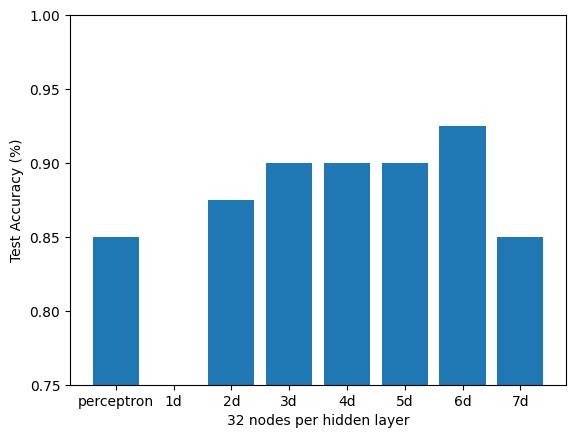

In [19]:
import matplotlib.pyplot as plt
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [20]:
probabilities = [model.predict(X_test) for model in models]

# Convert probabilities to class labels
predicted_labels = [np.argmax(prob, axis=1) for prob in probabilities]

# Assuming y_test is your actual labels
# Convert y_test to class labels if it's not already in that format
# This step depends on how y_test is structured. If it's one-hot encoded, you might need to use np.argmax(y_test, axis=1)

# Print predicted and actual labels for each model
for i, labels in enumerate(predicted_labels):
    print(f"Model {i+1} Predicted Labels: {labels}")
    print(f"Actual Labels: {y_test}")

2/2 [==============================] - 0s 4ms/step
Model 1 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 2 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 3 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 4 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 5 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Label